# Wavelate Decomposition of Gradient Boosting Algorithm - Example 1 (How to use)


In this notebook we will use WGB (Wavelate Gradient Boosting) for regression and classification problem.
This notebook is an introduction and consists first steps of how-to-use WGB as well as xgboost and sklearn's gradient boostion, with default parameters for general dataset.


Import all libriries and functions before starting:

In [11]:
import sys
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from xgboost import XGBClassifier,XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

from WaveletGBoost.WaveletDecisionTreeClassifier import WaveletDecisionTreeClassifier
from WaveletGBoost.WaveletDecisionTreeRegressor import WaveletDecisionTreeRegressor
from WaveletGBoost.WaveletGBoostingClassifier import WaveletGBoostingClassifier
from WaveletGBoost.WaveletGBoostingRegressor import WaveletGBoostingRegrssor
import WaveletGBoost.wgbm_utils as wgbmu

from Datasets.utils.data_reader import data_reader

## Regression assignment

Load regression dataset:

Dataset: Prostate
Number of instences: 97
Number of features: 8


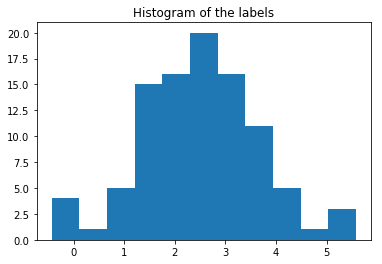

In [12]:
data_path = './Datasets/regression/'
dataset_name = 'Prostate'
classification = False

X , y = data_reader (data_path = data_path, dataset_name=dataset_name ,classification=classification)

print ('Dataset:',dataset_name)
print ('Number of instences:',len(X))
print ('Number of features:',len(X[0]))

plt.hist(y, bins='auto')
plt.title("Histogram of the labels")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


Run WGBoost , XGBoost and SKLearn-GradientBoosting (with default parameters):

In [14]:

wgbm = WaveletGBoostingRegrssor ()
wgbm.fit ( X_train , y_train )
y_pred_wgb = wgbm.predict ( X_test )

xgb = XGBRegressor ()
xgb.fit ( X_train , y_train )
y_pred_xgb = xgb.predict ( X_test )

skg = GradientBoostingRegressor ()
skg.fit ( X_train , y_train )
y_pred_skg = skg.predict ( X_test )


Regression results:

In [15]:
print ( 'WGBoosting MSE error:', wgbmu.MSE ( y_test , y_pred_wgb ) )
print ( 'XGBoosting MSE error:', wgbmu.MSE ( y_test , y_pred_xgb ) )
print ( 'skleargb MSE error:', wgbmu.MSE ( y_test , y_pred_skg ) )


WGBoosting MSE error: 0.9157266455258859
XGBoosting MSE error: 0.9417693047333343
skleargb MSE error: 0.9817947057547249


# Classification assignment

Load classification dataset:

Dataset: glass
Number of instences: 214
Number of features: 10


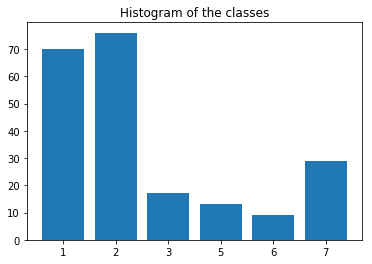

In [9]:
data_path = './Datasets/classification//'
dataset_name = 'glass'
classification = True

X , y = data_reader (data_path = data_path, dataset_name=dataset_name ,classification=classification)

print ('Dataset:',dataset_name)
print ('Number of instences:',len(X))
print ('Number of features:',len(X[0]))

from collections import Counter
counts = Counter(y)
x = np.arange(len(counts))

plt.bar(x,height=[counts[k] for k in counts.keys()])
plt.title("Histogram of the classes")
plt.xticks(x, [k for k in counts.keys()])

plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


Run WGBoost , XGBoost and SKLearn-GradientBoosting (with default parameters):

In [10]:

wgbm = WaveletGBoostingClassifier ()
wgbm.fit ( X_train , y_train )
y_pred_wgb = wgbm.predict ( X_test )
print ( 'WGBoosting accuracy(%):', wgbmu.classification_error ( y_test , y_pred_wgb ) )

xgb = XGBClassifier ()
xgb.fit ( X_train , y_train )
y_pred_xgb = xgb.predict ( X_test )
print ( 'XGBoosting accuracy(%):', wgbmu.classification_error ( y_test , y_pred_xgb ) )

skg = GradientBoostingClassifier ()
skg.fit ( X_train , y_train )
y_pred_skg = skg.predict ( X_test )
print ( 'skleargb accuracy(%):', wgbmu.classification_error ( y_test , y_pred_skg ) )


WGBoosting accuracy(%): 1.0
XGBoosting accuracy(%): 0.9859154929577465
skleargb accuracy(%): 0.9859154929577465
